# Procesamiento de Imágenes
# Trabajo Práctico Nº1

## 1. Modos de color en imagenes

In [102]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage.color import rgb2gray
from PIL import Image
from skimage.metrics import structural_similarity

1. Utilizando openCV en python, cargar una imagen RGB y mostrarla en una ventana utilizando el
comando imread() y imshow(), tambien puede utilizar matplotlib para mostrarla.

In [3]:
# Clase que maneja el abrir y mostrar imágenes
class ImageManager:
  def __init__(self):
    pass

  # Método para leer imágenes
  def read_image(self, path):
    return cv2.imread(path)
  
  # Método para mostrar imágenes con imshow()
  def show_image_cv2(self, image):
    cv2.imshow('image', image)
    cv2.waitKey(0)  # Esperar hasta que se presione una tecla
    cv2.destroyAllWindows()  # Cierra la ventana después
  
  # Método para mostrar imágenes con matplotlib
  def show_image_matplotlib(self,image):
    plt.figure()
    plt.imshow(image)
    plt.show()
  
  # Método para convertir una imágen a array
  def convert_image_to_array(self,image):
    return np.array(image)
  
  # Método para dividir una imágen
  def split_image(self,image):
    return cv2.split(image)

  def convert_bgr_to_rgb(sefl, image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Asignar clase
image_manager = ImageManager()

In [ ]:

# Cargar imágen
butterfly_image = image_manager.read_image("../Images/mariposa.jpg")

#Mostrar imágen con imshow()
image_manager.show_image_cv2(butterfly_image)


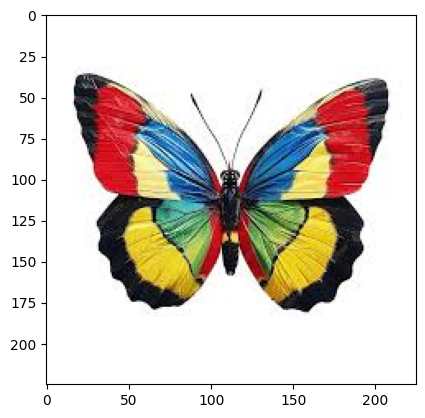

In [ ]:
#Mostrar imágen con matplotlib
image_manager.show_image_matplotlib(image_manager.convert_bgr_to_rgb(butterfly_image))

2. Una vez cargada la imagen de muestra podemos empezar usando numpy y su función array para
obtener el arreglo de valores de intensidad para cada uno de los canales de color.

In [ ]:
np_butterfly = image_manager.convert_image_to_array(butterfly_image)

print(np_butterfly.shape)

(225, 225, 3)


3. Retomando con el ejercicio 1, analizar la imagen cargada ¿Existe algún problema con los colores
mostrados con respecto a la imagen original?

ToDo

4. Cargar la imagen pero antes de mostrarla utilizar el comando cvtColor(). ¿Qué sucede ahora?

In [ ]:

butterfly_image_RGB = cv2.cvtColor(butterfly_image, cv2.COLOR_BGR2RGB)

image_manager.show_image_cv2(butterfly_image_RGB)

5. Utilizar la función split() para una imagen RGB y separar en canales.

In [ ]:
b, g, r = image_manager.split_image(butterfly_image)

6. (*) La conversión de una imagen de color a escala de grises se puede hacer de varias formas. El ejercicio consiste en convertir la imagen de Lenna color a escala de grises utilizando diferentes métodos.

In [ ]:

lenna_image = image_manager.read_image("../Images/Lenna.png")

# Clase que cambia los colores de una imágen
class ImageConversor:

    def __init__(self):
        pass
    
    #Recibe una imágen y una transformación de color dada por cv2.COLOR
    def cv2_color_conversor(self,image, transformation):
        return cv2.cvtColor(image, transformation)
    
    # Método que aplica la fórmula de lumiancia 
    def luminance_conversor(self, image): 
        b, g, r = image_manager.split_image(image) # Se separa la imágen en b,g,r
        # La formula de luminancia es:
        # 0.299 * r + 0.587 * g + 0.114 * b
        gray_image = 0.299 * r + 0.587 * g + 0.114 * b
        gray_image = gray_image.astype(np.uint8) # Convertir a enteros de 0 a 255
        return gray_image

    # Método que aplica rgb2gray
    def scickit_gray_conversor(self, image):
        image = image_manager.convert_bgr_to_rgb(image)
        return rgb2gray(image)

    
image_conversor = ImageConversor()


(a) Usando la libreria cv2 y el método cvtColor()

In [ ]:
lenna_cvtColor = image_conversor.cv2_color_conversor(lenna_image,cv2.COLOR_BGR2GRAY)

image_manager.show_image_cv2(lenna_cvtColor)

(b) Usando la fórmula de luminancia

In [ ]:
lenna_luminance = image_conversor.luminance_conversor(lenna_image)

image_manager.show_image_cv2(lenna_luminance)

(c) Usando scickit-image y el método rgb2gray()

In [ ]:
lenna_scickit = image_conversor.scickit_gray_conversor(lenna_image)

image_manager.show_image_cv2(lenna_scickit)

ToDo
(d) ¿Qué pasa con los canales?
(e) ¿Qué profundidad de bits tiene la imagen?
(f) Evaluar con otra imagen de mayor profundidad
(g) ¿Qué sucede con la imagen? ¿Ha cambiado algo?

7. (*) Convertir la imagen de Lenna a otros modos de color, como CMYK, HSV, HSL. Mostrar el
resultado.

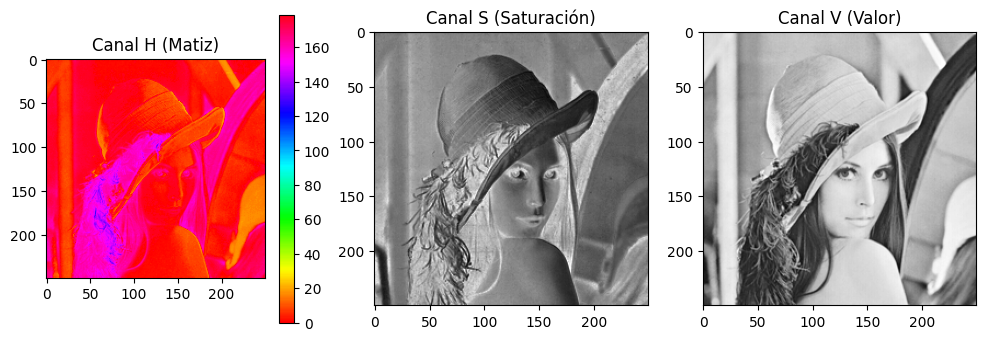

In [ ]:
# A HSV
lenna_HSV = image_conversor.cv2_color_conversor(lenna_image,cv2.COLOR_BGR2HSV)

# Separar canales HSV
h, s, v = image_manager.split_image(lenna_HSV)

# Mostrar canales
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(h, cmap='hsv')  # Mapa de color para el matiz (Hue)
plt.title("Canal H (Matiz)")
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')  # Saturación en escala de grises
plt.title("Canal S (Saturación)")

plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')  # Valor (brillo) en escala de grises
plt.title("Canal V (Valor)")

plt.show()

#image_manager.show_image_cv2(lenna_HSV)
#image_manager.show_image_matplotlib(lenna_HSV)

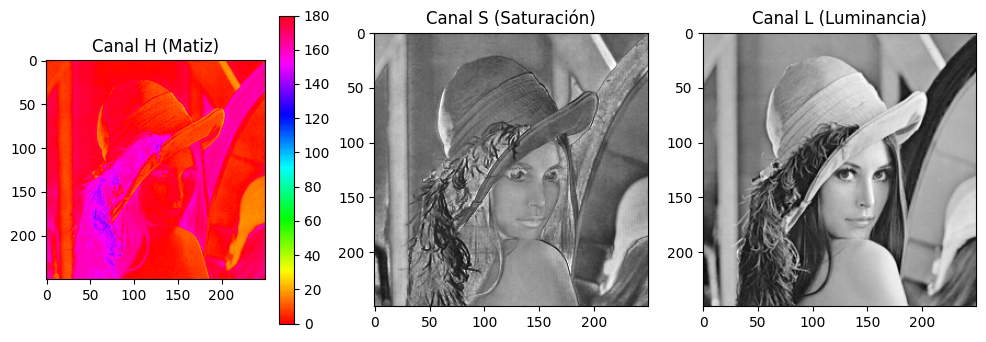

In [ ]:
# A HSL
lenna_HLS = image_conversor.cv2_color_conversor(lenna_image,cv2.COLOR_BGR2HLS)

h, l, s = image_manager.split_image(lenna_HLS)

# Mostrar canales HLS
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(h, cmap='hsv')  # Matiz (Hue)
plt.title("Canal H (Matiz)")
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')  # Saturación (Saturation)
plt.title("Canal S (Saturación)")

plt.subplot(1, 3, 3)
plt.imshow(l, cmap='gray')  # Luminancia (Lightness)
plt.title("Canal L (Luminancia)")

plt.show()

#image_manager.show_image_cv2(lenna_HLS)


In [ ]:
# A CMYK

lenna_CMYK = Image.open("../Images/Lenna.png")
lenna_CMYK = lenna_CMYK.convert("CMYK")

# ToDo

8. (*) Tomar la imagen convertida en escala de grises y volver a convertir al en modo RGB. ¿Qué ha
sucedido?

9. Cargar una imagen en color con OpenCV. Extrae los valores de un píxel en la posición (x, y). Modifica un  ́area de la imagen (por ejemplo, convierte una región a rojo puro). Divide la imagen en sus tres canales de color (B, G, R) y muestra cada uno por separado.

## 2. Compresion de Imagenes

1. ¿El formato BMP es un formato de compresión?

No, el formato BMP (Bitmap) no es un formato de compresión. Por el contrario, este formato, no tiene compresión, sino que almacena los píxels de forma directa, lo que suele resultar en archivos grandes.

2. (*) Dar detalles de las siguientes métricas de calidad de compresión (PSNR, SSIM)

**PSNR (Peak Signal-To-Noise Ratio)**: esta métrica mide la relación de señal a ruido entre la imagen original y la imagen comprimida. Se expresa en decibeles (dB) y se mide **píxel a píxel**. Un PSNR más alto indica una mejor calidad de la imagen comprimida en comparación con la original. Se calcula utilizando la siguiente fórmula:

1. Obtener el MSE (Mean Squared Error) entre la imagen original y la imagen comprimida (considerando que el tamaño de las imágenes es el mismo, N x M, y que $I(x,y)$ es el valor de intensidad del píxel en la posición (x,y) de la imagen): 
$$MSE = \dfrac{1}{N \cdot M} \sum_{x=1}^N \sum_{y=1}^M (I_{original}(x,y) -  I_{comprimida}(x,y))^2$$
2. Calcular el PSNR utilizando la siguiente fórmula:
$$PSNR = 10 \cdot log_{10} \left( \dfrac{MAX^2}{MSE} \right)$$
donde $MAX$ es el valor máximo posible de un píxel (255 para imágenes de 8 bits por canal).

La fórmula anterior aplica para imágenes en escala de grises. Para imágenes a color, se calcula el PSNR para cada canal (R, G, B) y se promedian los resultados.

**SSIM (Structural Similarity Index)**: esta métrica mide la similitud estructural entre dos imágenes. A diferencia del PSNR, que se basa en la diferencia píxel a píxel, el SSIM tiene en cuenta la luminancia, el contraste y la estructura de las imágenes, lo que resulta en una medida más similar a la percepción humana. El SSIM varía entre 0 y 1, donde 1 indica que las imágenes son idénticas y valores cercanos a 0 indican poca.

No se agrega la fórmula del SSIM, ya que es más compleja, pero es importante conocer que se calculan a partir de medidas estadísticas de la imagen original y la imagen comprimida, como la media, la varianza y la covarianza.

3. ¿Cúal es el impacto de la compresión en el procesamiento posterior de una imagen?

Para responder a esta pregunta, es necesario tener en cuenta el tipo de compresión que se aplica a la imagen y qué tarea se desea realizar posteriormente.

En principio, si utilizamos compresión sin pérdida, no debería haber un impacto significativo en el procesamiento posterior de la imagen, más allá del _overhead_ de tiempo que puede llevar descomprimir la imagen antes de procesarla (usualmente despreciable).


Por otro lado, la compresión con pérdida puede afectar a las tareas posteriores, aunque debe realizarse un análisis caso a caso. Generalmente, si el factor de compresión es relativamente bajo (y la tarea no es extremadamente sensible) el impacto será mínimo [\[1\]](https://arxiv.org/pdf/1604.04004) [\[2\]](https://arxiv.org/pdf/2409.16733). Un mayor factor de compresión puede llevar a una pérdida de información significativa, lo que puede traer problemas como los _Artifacts JPEG_ o la pérdida de detalles en la imagen. 

4. Cargar una imagen en color. Guarda la imagen con diferentes niveles de calidad (ejemplo: 90%, 50%,
10%). Comparar el tamaño, resolución, calidad, profundidad de bits de los archivos y la pérdida de
calidad. ¿Qué puede comentar de las im ́agenes resultantes?

In [ ]:
base_image = "../Images/tp2/ej4/Original.jpg"

def save_with_quality(path, target_path, quality):
    print(f"Saving {path} {target_path} with quality {quality}")
    image = Image.open(path)
    image = image.convert("RGB")  # Convert to RGB before saving as JPEG
    image.save(target_path, "JPEG", quality=quality)

image_target_path = "../Images/tp2/ej4"
if not os.path.exists(image_target_path):
    os.makedirs(image_target_path)


save_with_quality(base_image, f"{image_target_path}/90.jpg", quality=90)
save_with_quality(base_image, f"{image_target_path}/50.jpg", quality=50)
save_with_quality(base_image, f"{image_target_path}/10.jpg", quality=10)



Saving ../Images/tp2/ej4/Original.jpg ../Images/tp2/ej4/90.jpg with quality 90
Saving ../Images/tp2/ej4/Original.jpg ../Images/tp2/ej4/50.jpg with quality 50
Saving ../Images/tp2/ej4/Original.jpg ../Images/tp2/ej4/10.jpg with quality 10


In [ ]:

def get_image_parameters(path):
    image = Image.open(path)
    width, height = image.size
    bit_depth = image.bits
    size = os.path.getsize(path)
    return width, height, bit_depth, size

base_path = "../Images/tp2/ej4/"
image_list = ["Original.jpg","90.jpg", "50.jpg", "10.jpg"]

for image in image_list:
    path = os.path.join(base_path, image)
    width, height, bit_depth, size = get_image_parameters(path)
    kb_size = (size // 1024)
    print(f"{image.split('.')[0]} | Resolución: {width}x{height} | Profundidad de color: {bit_depth} | Tamaño: {kb_size} kb")
    print("-" * 50)

Original | Resolución: 6000x4000 | Profundidad de color: 8 | Tamaño: 2229 kb
--------------------------------------------------
90 | Resolución: 6000x4000 | Profundidad de color: 8 | Tamaño: 3065 kb
--------------------------------------------------
50 | Resolución: 6000x4000 | Profundidad de color: 8 | Tamaño: 1624 kb
--------------------------------------------------
10 | Resolución: 6000x4000 | Profundidad de color: 8 | Tamaño: 550 kb
--------------------------------------------------


La pérdida de calidad es imperceptible en las imágenes con calidad 50% y 90%, pero en la imagen con calidad 10% se observa gran pérdida de calidad, particularmente en el fondo (los anteriormente mencionados _Artifacts JPEG_). 

En cuanto al tamaño de los archivos, la imagen con calidad 10% tiene un 25% del tamaño de la imagen original, mientras que la imagen con calidad 50% tiene un 65%. Contraintuivamente, la imagen con calidad 90% tiene un tamaño mayor al original. Esto se debe a que la construcción de la imagen JPEG involucra eliminar datos redundantes y reemplazarlos por metadata. En este caso, como se mantienen casi todos los datos de la imagen original, el tamaño del archivo es mayor al original.

La profundidad de bits y resolución de las imágenes no cambian, ya que la compresión JPEG no afecta a estos parámetros. La profundidad de bits se mantiene en 8 bits por canal y la resolución es la misma que la imagen original (6000x4000)

5. Guardar una imagen en formato PNG con distintos niveles de compresión (0 a 9). Comparar el
tamaño de los archivos generados.

Text(0.5, 1.0, 'Tamaño de imagen PNG vs Nivel de compresión')

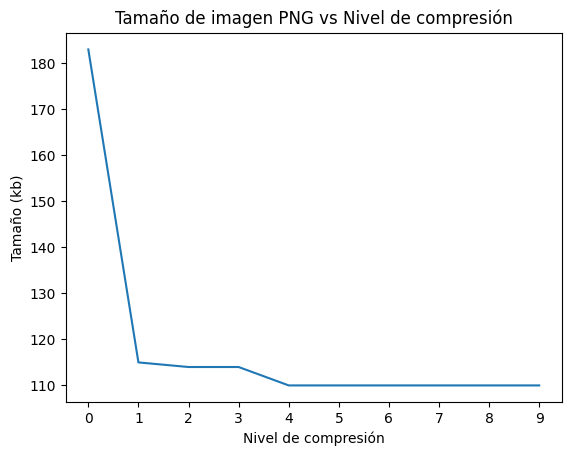

In [ ]:
image_path = '../Images/Lenna.png'
target_path = '../Images/tp2/ej5'
def save_to_png(image_path, target_path, compression_level):
    if not os.path.exists(target_path):
        os.makedirs(target_path)
    image = Image.open(image_path)
    image.save(os.path.join(target_path, f'{compression_level}.png'), format='PNG', compress_level=compression_level)

for i in range(10):
    save_to_png(image_path, target_path, i)

def get_image_size(compression_level):
    image = Image.open(os.path.join(target_path, f'{compression_level}.png'))
    size = os.path.getsize(os.path.join(target_path, f'{compression_level}.png'))
    kb_size = (size // 1024)
    return kb_size

compression_levels = range(10)
sizes = [get_image_size(i) for i in compression_levels]

plt.plot(compression_levels, sizes)
plt.xlabel('Nivel de compresión')
plt.xticks(compression_levels)
plt.ylabel('Tamaño (kb)')
plt.title('Tamaño de imagen PNG vs Nivel de compresión')
    
    

En el gráfico anterior, podemos observar que el tamaño disminuye apenas aumentamos el nivel de compresión de cero.
Esto ocurre solo hasta cierto punto, ya que a partir de un nivel de compresión de 4, el tamaño de los archivos se mantiene constante (igual al original PNG).

6. (*) Implementar un modelo de compresión basado en codificación Run-Length Encoding (RLE). El
algoritmo Run-Length Encoding (RLE) reduce el tamaño de una imagen representando secuencias
consecutivas de píxeles idénticos como una sola entrada. Para ello convertir una imagen en escala de
grises. luego, implementar el algoritmo RLE para comprimir la imagen. Posteriormente, implementar
una función para descomprimir la imagen. Al finalizar, mostrar la imagen original y la imagen
reconstruida. Probar con dos o tres imagenes que tengan diferentes características, modos de color.
utilizar alguna de las metricas nombradas anteriormente y evaluar el resultado de la misma.

In [107]:
def run_length_encode(sequence):
    encoded = []
    prev_val = sequence[0]
    count = 1

    for val in sequence[1:]:
        if val == prev_val:
            count += 1
        else:
            encoded.append((prev_val, count))
            prev_val = val
            count = 1

    encoded.append((prev_val, count))
    return encoded


def run_length_decode(encoded_sequence):
    decoded = []
    
    for item in encoded_sequence:
        val, count = item
        decoded.extend([int(val)] * int(count))
        
    return decoded


In [63]:

def run_length_encode_image(image):
    flat_image = image.flatten()
    encoded = run_length_encode(flat_image)
    return encoded


def run_length_decode_image(encoded_sequence, shape):
    decoded_values = run_length_decode(encoded_sequence)
    decoded_image = np.array(decoded_values, dtype=np.uint8)
    decoded_image = decoded_image.reshape(shape)
    return decoded_image


sequence = np.array([[255, 0, 1, 0, 1, 0, 2, 1, 0], [1, 0, 1, 0, 1, 1, 0, 0, 0]])
assert np.array_equal(sequence, run_length_decode_image(run_length_encode_image(sequence), sequence.shape))

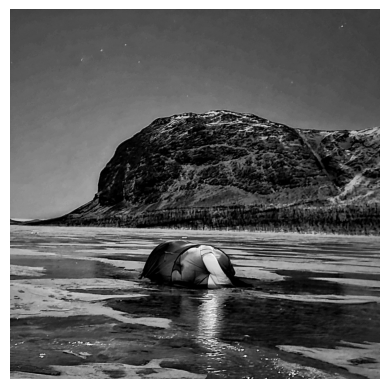

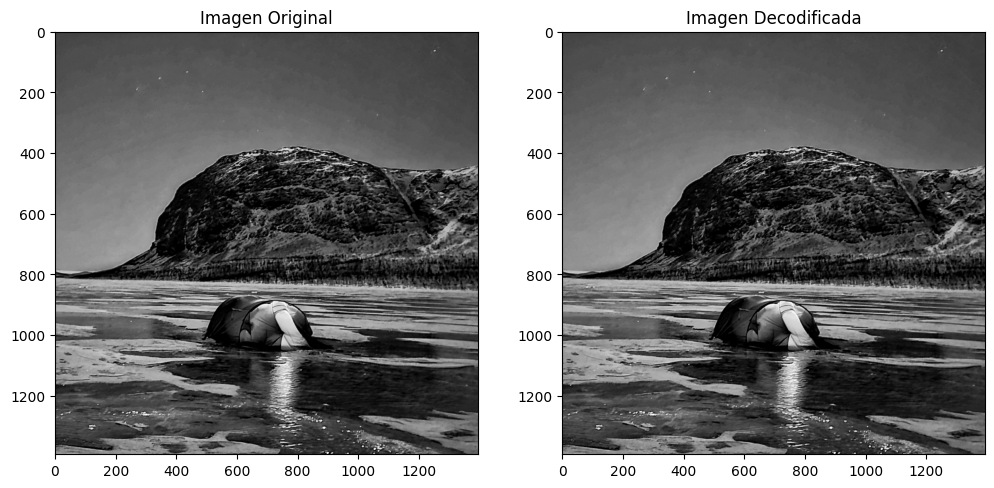

In [ ]:
image_path = '../Images/tp2/ej6/base.jpg'
image = Image.open(image_path)
image = image.convert("L")  # Convertir a escala de grises

# Mostrar la imagen convertida
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


def show_image_comparison(original,decoded):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Imagen Original")
    plt.subplot(1, 2, 2)
    plt.imshow(decoded, cmap='gray')
    plt.title("Imagen Decodificada")
    plt.show()

def encode_decode_image(image_path):
    image = Image.open(image_path)
    image = image.convert("L")  # Convertir a escala de grises
    original_shape = image.size
    encoded_image = run_length_encode_image(np.array(image))
    decoded_image = run_length_decode_image(encoded_image, (original_shape[1], original_shape[0])) 
    show_image_comparison(np.array(image), decoded_image)

    original_image = np.array(image)
    return original_image,encoded_image

original, encoded_image = encode_decode_image(image_path)


In [ ]:
import struct

def save_encoded_image(encoded_image, path):

    max_value = max(value for value, _ in encoded_image)
    max_count = max(count for _, count in encoded_image)

    value_bytes = (int(max_value).bit_length() + 7) // 8 
    count_bytes = (int(max_count).bit_length() + 7) // 8

    # Infer the appropriate format for packing
    if value_bytes == 1:
        value_format = 'B'
    elif value_bytes == 2:
        value_format = 'H' 
    elif value_bytes <= 4:
        value_format = 'I' 
    else:
        raise ValueError("Value size exceeds supported byte sizes.")

    if count_bytes == 1:
        count_format = 'B'  
    elif count_bytes == 2:
        count_format = 'H'  
    elif count_bytes <= 4:
        count_format = 'I'  
    else:
        raise ValueError("Count size exceeds supported byte sizes.")

    # Pack the encoded image into binary format
    with open(path, 'wb') as f:
        for value, count in encoded_image:
            packed_data = struct.pack(f'{value_format}{count_format}', int(value), int(count))
            f.write(packed_data)

def load_encoded_image(path):
    decoded_image = []
    
    with open(path, 'rb') as f:
        while True:
            data = f.read(8)
            if not data:
                break
            
            value, count = struct.unpack('ii', data)
            decoded_image.append((value, count))
    
    return decoded_image


def get_image_size(path):
    size = os.path.getsize(path)
    kb_size = (size // 1024)
    return kb_size

bit_depth_map = {
    'uint8': 8,
    'uint16': 16,
    'int32': 32,
    'float32': 32,  
}

def get_image_metadata_from_image(image,path):
    width, height = image.size


    bit_depth = getattr(image, 'bits', None) 

    if bit_depth is None:
        cv_image = cv2.imread(path)
        dtype = getattr(cv_image, 'dtype', None)
        if dtype is not None:
            bit_depth = bit_depth_map.get(str(cv_image.dtype), 'Unknown')

        
    size = os.path.getsize(path)
    kb_size = (size // 1024)
    return width, height, bit_depth, kb_size
    

def image_from_list(encoded_image,shape):
    decoded_values = run_length_decode(encoded_image)
    decoded_image = np.array(decoded_values, dtype=np.uint8)
    decoded_image = decoded_image.reshape((shape[1], shape[0]))
    return decoded_image


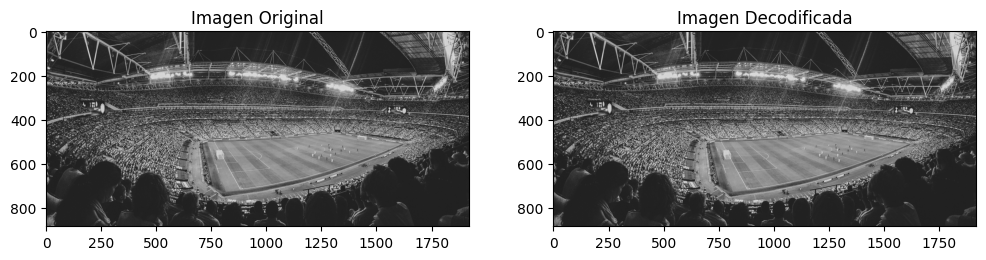

Imagen original: 02.jpg | Tamaño: 678 kb |1920x885 | 8 bits
Imagen encodeada: 02.jpg | Tamaño: 2711 kb |  1920x885 | None bits
Factor de compresión: 0.25x
Índice SSIM: 1.0000
--------------------------------------------------


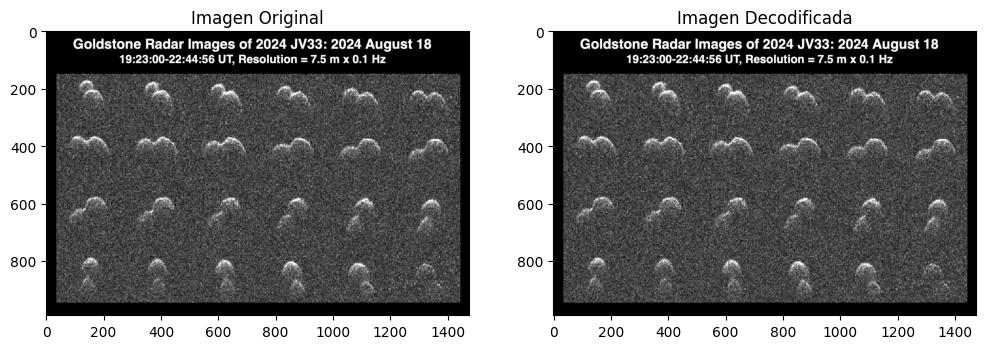

Imagen original: 01.tif | Tamaño: 1197 kb |1474x990 | 8 bits
Imagen encodeada: 01.tif | Tamaño: 4027 kb |  1474x990 | None bits
Factor de compresión: 0.30x
Índice SSIM: 1.0000
--------------------------------------------------


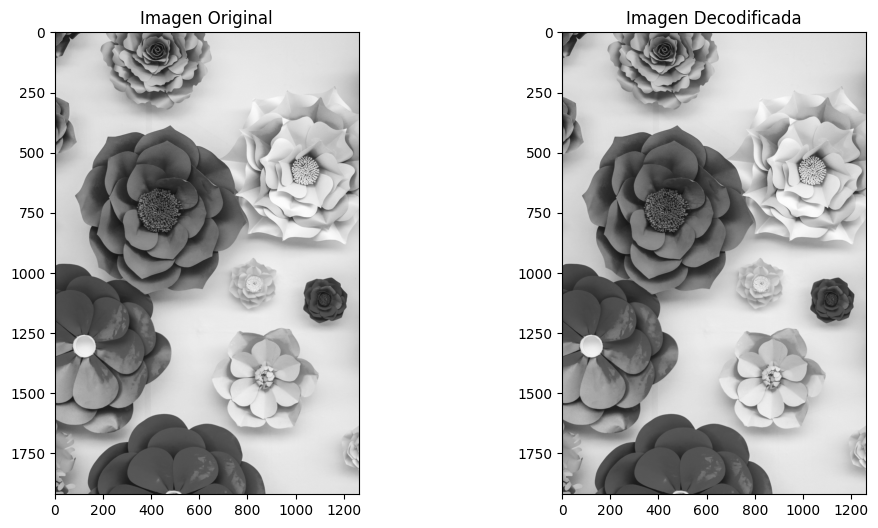

Imagen original: 04.jpg | Tamaño: 477 kb |1262x1920 | 8 bits
Imagen encodeada: 04.jpg | Tamaño: 3466 kb |  1262x1920 | None bits
Factor de compresión: 0.14x
Índice SSIM: 1.0000
--------------------------------------------------


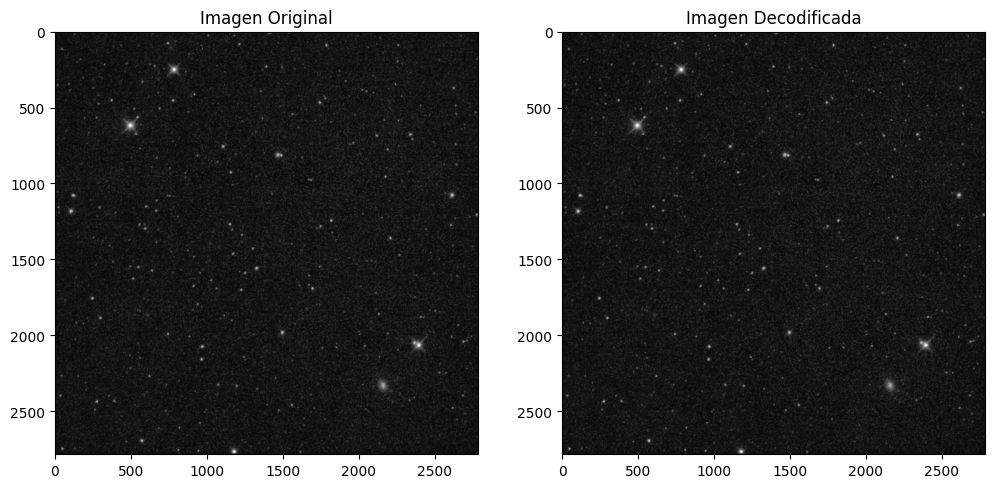

Imagen original: 03.tif | Tamaño: 17497 kb |2784x2784 | 8 bits
Imagen encodeada: 03.tif | Tamaño: 12185 kb |  2784x2784 | None bits
Factor de compresión: 1.44x
Índice SSIM: 1.0000
--------------------------------------------------


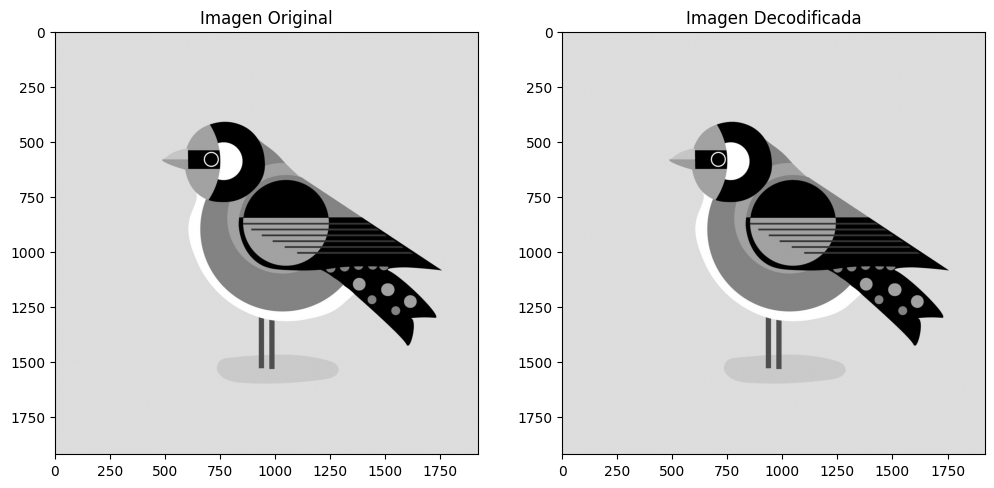

Imagen original: 05.jpg | Tamaño: 116 kb |1920x1920 | 8 bits
Imagen encodeada: 05.jpg | Tamaño: 1002 kb |  1920x1920 | None bits
Factor de compresión: 0.12x
Índice SSIM: 1.0000
--------------------------------------------------


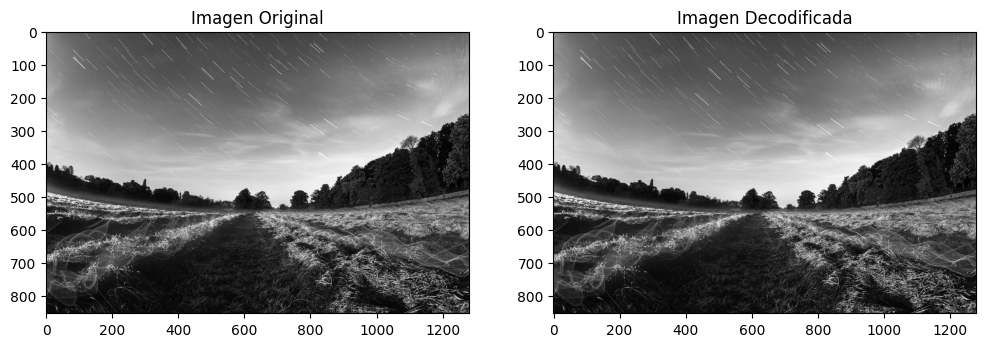

Imagen original: 06.bmp | Tamaño: 3198 kb |1280x853 | 8 bits
Imagen encodeada: 06.bmp | Tamaño: 1963 kb |  1280x853 | None bits
Factor de compresión: 1.63x
Índice SSIM: 1.0000
--------------------------------------------------


In [106]:
target_dir = '../Images/tp2/ej6/tests'
output_dir = '../Images/tp2/ej6/encoded'

# Iterate through all files and run-length encode them
for filename in os.listdir(target_dir):
    name, ext = os.path.splitext(filename)
    original, encoded = encode_decode_image(os.path.join(target_dir, filename))
    encoded_path = os.path.join(output_dir, f'{name}.rle')

    save_encoded_image(encoded, encoded_path)
    original_path = os.path.join(target_dir, filename)

    original_image = Image.open(original_path)
    decoded_image = image_from_list(encoded, original_image.size)
    encoded_image = Image.fromarray(decoded_image)

    o_width, o_height, o_depth, o_size = get_image_metadata_from_image(original_image, original_path)
    e_width, e_height, e_depth, e_size = get_image_metadata_from_image(encoded_image, encoded_path)

    ssim_index, _ = structural_similarity(original, decoded_image, full=True)
    
    print(f"Imagen original: {filename} | Tamaño: {o_size} kb |{o_width}x{o_height} | {o_depth} bits")
    print(f"Imagen encodeada: {filename} | Tamaño: {e_size} kb |  {e_width}x{e_height} | {e_depth} bits")
    print(f"Factor de compresión: {o_size / e_size:.2f}x")
    print(f"Índice SSIM: {ssim_index:.4f}")

    print("-" * 50)


    

El resultado de la celda anterior corresponde a los experimentos relacionados con la compresión utilizando RLE.

Los resultados obtenidos fureon los siguientes

- Todas las imágenes de entrada tenían una profundidad de bits de 8 y diferentes formatos.
- La compresión RLE no modificó la resolución de las imágenes.
- Por tratarse de una compresión sin pérdida, la calidad de las imágenes originales y reconstruidas es idéntica, lo que significa que el resultado de aplicar SSIM es siempre 1.
- En todos los casos excepto en el último, el tamaño del archivo comprimido fue mayor que el tamaño del archivo original. Esto se debe a que las imágenes de entrada ya pertenecían a formatos comprimidos (jpg) o no contaban con grandes regiones de color uniformes. La última imagen (formato Bitmap) si experimentó una reducción en el tamaño.